---
This notebook performs k-means clustering using Mall Customers dataset from Udemy Course "Machine Learning A-Z: AI, Python & R": (https://www.udemy.com/course/machinelearning/?couponCode=LEADERSALE24A)

The dataset has 200 sample that has these features:
- CustomerID
- Genre	
- Age	
- Annual Income (k$)	
- Spending Score (1-100)
---

Problem Definition: 

In the competitive landscape of modern business, understanding customer behavior and preferences is crucial for tailoring marketing strategies, improving customer satisfaction, and enhancing overall business performance. However, customer bases are often diverse, with individuals exhibiting varying purchasing behaviors and preferences. This diversity makes it challenging to develop a one-size-fits-all approach to marketing and customer service.

The primary objective is to segment the customer base into distinct groups with similar characteristics. By identifying these groups, the business can create targeted marketing strategies, personalize customer experiences, and allocate resources more effectively.

---

Importing Libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score


import warnings
warnings.filterwarnings('ignore')


Loading Data

In [3]:

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


PreProcessing

In [4]:

# Encode 'Genre' column
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])

# Select features for clustering
features = ['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# # Standardize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


Identifying Outliers Existing

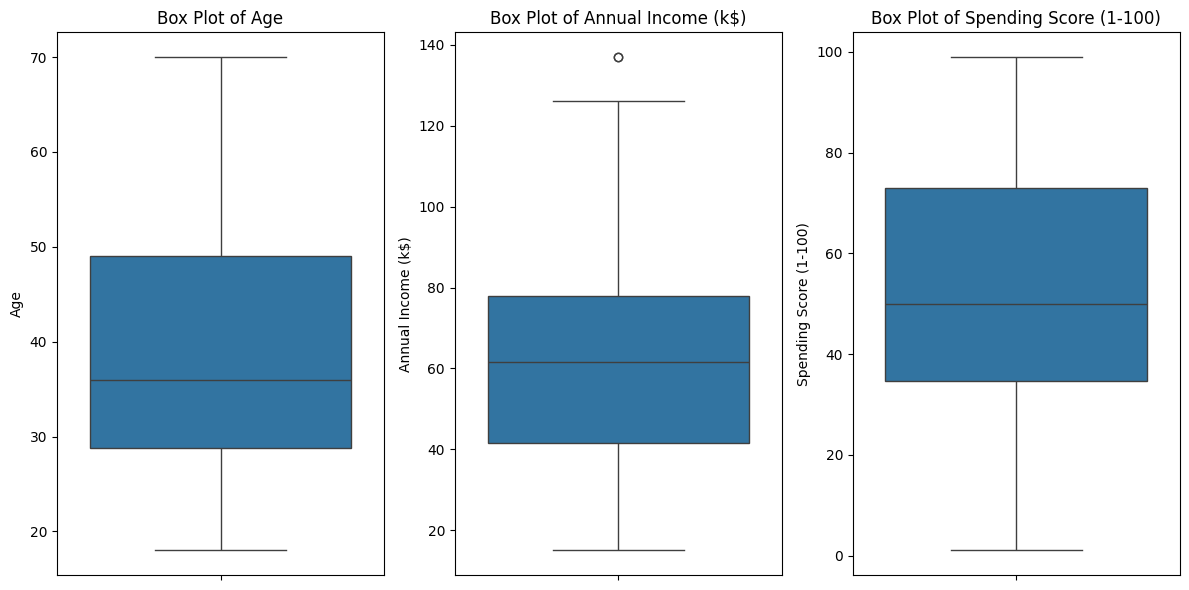

In [8]:
# Plot box plots for each feature
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(12, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()


Plotting the data

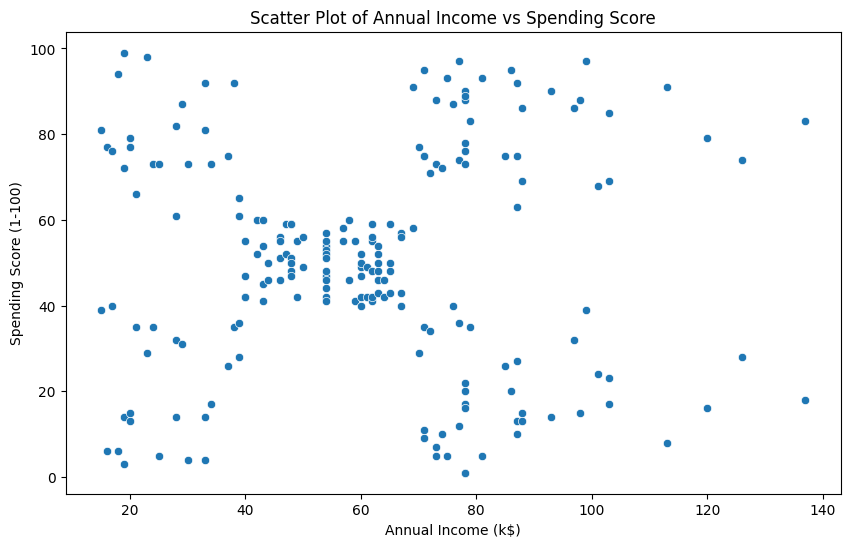

In [9]:
# Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


Finding Optimal K

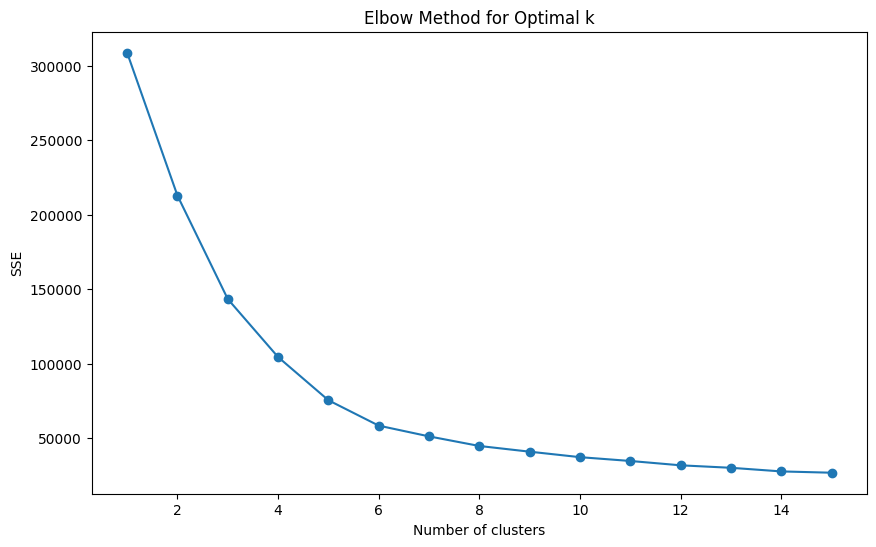

In [6]:
# Elbow method to determine the number of clusters
sse = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot SSE against number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


Performing k-means clustering


K-Means Clustering with k=5
Cluster sizes:
Cluster 0: 23 customers
Cluster 1: 79 customers
Cluster 2: 39 customers
Cluster 3: 36 customers
Cluster 4: 23 customers

Cluster centroids:
      Genre        Age  Annual Income (k$)  Spending Score (1-100)
0  0.391304  45.217391           26.304348               20.913043
1  0.417722  43.088608           55.291139               49.569620
2  0.461538  32.692308           86.538462               82.128205
3  0.527778  40.666667           87.750000               17.583333
4  0.391304  25.521739           26.304348               78.565217


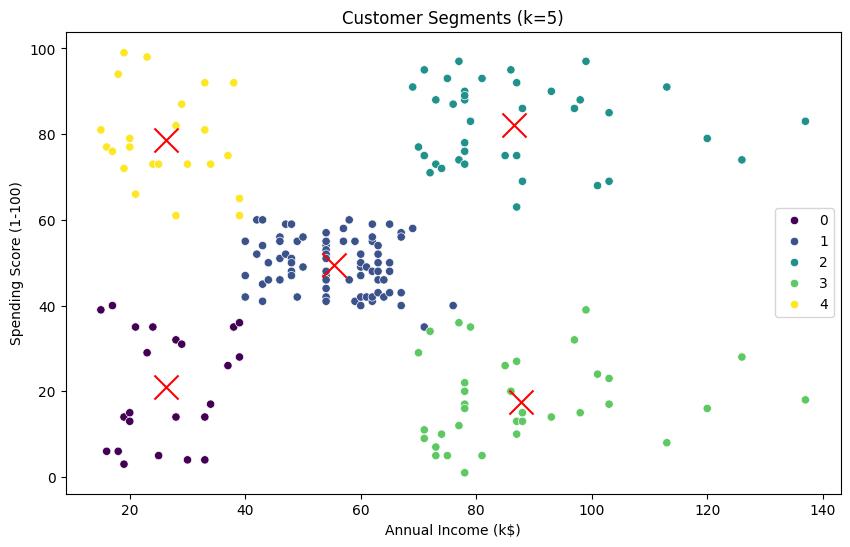

Silhouette Score for k=5: 0.4440669204743008
Davies-Bouldin Index for k=5: 0.8222596417814187

K-Means Clustering with k=6
Cluster sizes:
Cluster 0: 45 customers
Cluster 1: 35 customers
Cluster 2: 22 customers
Cluster 3: 38 customers
Cluster 4: 39 customers
Cluster 5: 21 customers

Cluster centroids:
      Genre        Age  Annual Income (k$)  Spending Score (1-100)
0  0.444444  56.155556           53.377778               49.088889
1  0.571429  41.685714           88.228571               17.285714
2  0.409091  25.272727           25.727273               79.363636
3  0.342105  27.000000           56.657895               49.131579
4  0.461538  32.692308           86.538462               82.128205
5  0.380952  44.142857           25.142857               19.523810


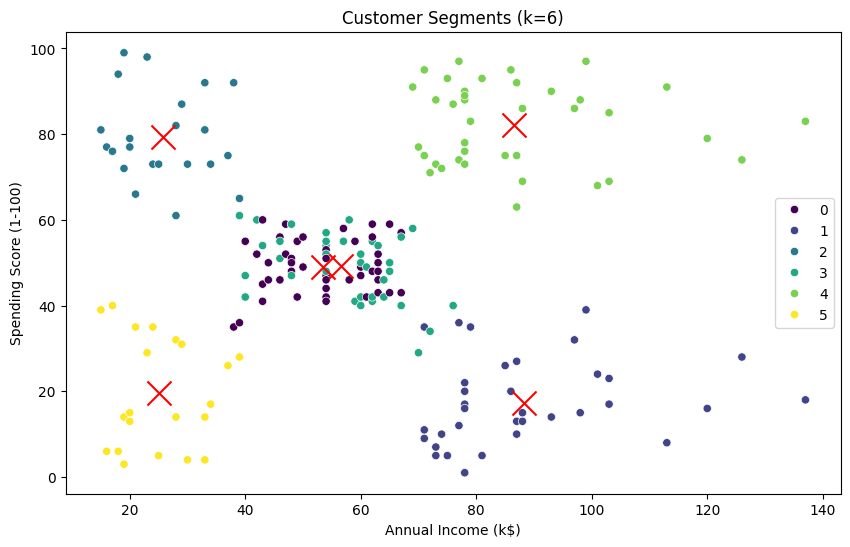

Silhouette Score for k=6: 0.45205475380756527
Davies-Bouldin Index for k=6: 0.7475215820921529

K-Means Clustering with k=7
Cluster sizes:
Cluster 0: 38 customers
Cluster 1: 45 customers
Cluster 2: 29 customers
Cluster 3: 35 customers
Cluster 4: 22 customers
Cluster 5: 21 customers
Cluster 6: 10 customers

Cluster centroids:
      Genre        Age  Annual Income (k$)  Spending Score (1-100)
0  0.342105  27.000000           56.657895               49.131579
1  0.444444  56.155556           53.377778               49.088889
2  0.482759  32.862069           78.551724               82.172414
3  0.571429  41.685714           88.228571               17.285714
4  0.409091  25.272727           25.727273               79.363636
5  0.380952  44.142857           25.142857               19.523810
6  0.400000  32.200000          109.700000               82.000000


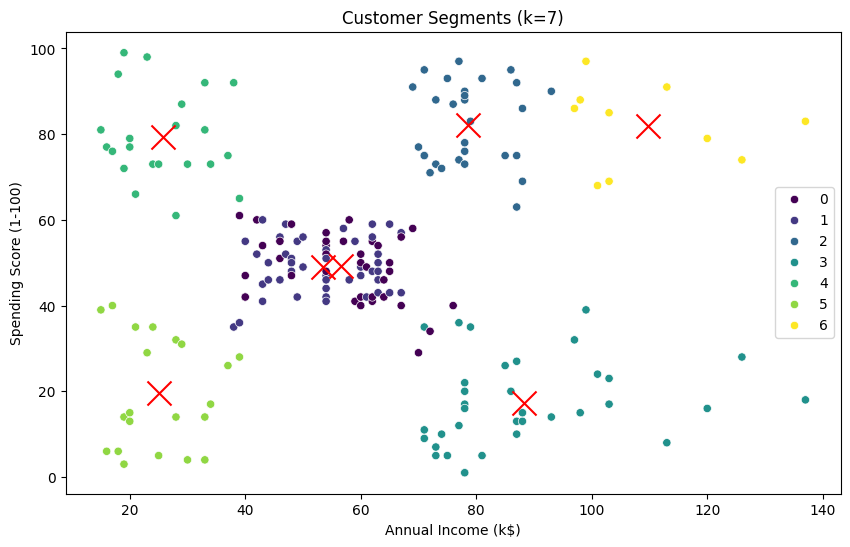

Silhouette Score for k=7: 0.4409411333609709
Davies-Bouldin Index for k=7: 0.7892608969186631

K-Means Clustering with k=8
Cluster sizes:
Cluster 0: 44 customers
Cluster 1: 7 customers
Cluster 2: 32 customers
Cluster 3: 25 customers
Cluster 4: 22 customers
Cluster 5: 22 customers
Cluster 6: 38 customers
Cluster 7: 10 customers

Cluster centroids:
      Genre        Age  Annual Income (k$)  Spending Score (1-100)
0  0.431818  56.340909           53.704545               49.386364
1  0.428571  33.000000          114.714286               78.428571
2  0.468750  32.625000           80.375000               82.937500
3  0.680000  41.960000           79.640000               15.400000
4  0.409091  25.272727           25.727273               79.363636
5  0.409091  44.318182           25.772727               20.272727
6  0.342105  27.000000           56.657895               49.131579
7  0.300000  41.000000          109.700000               22.000000


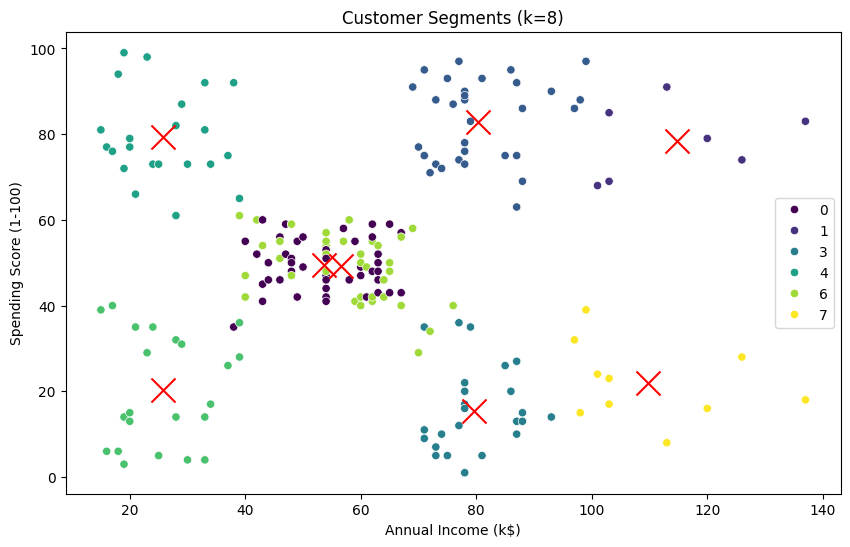

Silhouette Score for k=8: 0.43249096868827536
Davies-Bouldin Index for k=8: 0.8366925632870889


In [7]:
# Fit K-Means with the optimal number of clusters (k from 5 to 8)
for optimal_k in range(5, 9):
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    # Add cluster labels to the original data
    data['Cluster'] = clusters
    
    # Print size of each cluster and centroids
    print(f"\nK-Means Clustering with k={optimal_k}")
    cluster_sizes = data['Cluster'].value_counts().sort_index()
    centroids = kmeans.cluster_centers_
    
    print("Cluster sizes:")
    for cluster, size in cluster_sizes.items():
        print(f"Cluster {cluster}: {size} customers")
    
    print("\nCluster centroids:")
    centroid_df = pd.DataFrame(centroids, columns=features)
    print(centroid_df)
    
    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
    plt.scatter(centroids[:, 2], centroids[:, 3], s=300, c='red', marker='x')  # Plot centroids
    plt.title(f'Customer Segments (k={optimal_k})')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()
    
    # Evaluate the clustering
    sil_score = silhouette_score(X, clusters)
    db_score = davies_bouldin_score(X, clusters)
    
    print(f'Silhouette Score for k={optimal_k}: {sil_score}')
    print(f'Davies-Bouldin Index for k={optimal_k}: {db_score}')
   

Insights:


### Customer Segmentation Insights Based on Clustering (k=5) 

The scatter plot shows five distinct customer segments based on their Annual Income (k$) and Spending Score (1-100). Below are the detailed insights for each cluster:

| Cluster Number | Size | Income | Spending |
| --- | --- | --- | --- |
|       0        |  23  |  Low   |   Low    |
|       1        |  79  | Medium |  Medium  |
|       2        |  39  |  High  |   High   |
|       3        |  36  |  High  |   Low    |
|       4        |  25  |  Low   |   High   |


- Cluster 0: This cluster typically consists of customers who have lower incomes and are conservative in their spending habits.
We can introduce budget-friendly products and basic services and implement cost-saving promotions and loyalty programs that offer discounts or small incentives for consistent, low-level spending.

- Cluster 1: This group represents a balanced customer base with moderate income and spending behavior. We need to focus on value-for-money offerings and highlight product features and benefits and develop marketing campaigns that emphasize the quality and utility of products and services at reasonable prices.

- Cluster 2: These customers have high incomes and tend to spend significantly on products and services. We should offer premium products and exclusive services. Implement personalized marketing strategies that focus on luxury and exclusivity and consider VIP programs and high-end loyalty benefits to retain these high-value customers.

- Cluster 3: Customers in this cluster have high incomes but are frugal with their spending. We can ask them to identify barriers to spending and address them through tailored promotions. Emphasize the long-term value and investment in higher-end products. Offer savings plans, bundled deals, or premium discounts to encourage higher spending.

- Cluster 4:This group consists of customers who have low incomes but exhibit high spending behavior, potentially indicating aspirational spending or indulgence. We provide affordable luxury or aspirational product lines, create targeted promotions that allow for flexible payment options, such as installment plans, and highlight the emotional and status benefits of products to cater to their spending motivations.



In summary:
We can use the insights from the customer segmentation analysis to develop targeted marketing strategies and product offerings that appeal to different customer segments. By understanding the unique characteristics of each cluster, we can create tailored campaigns and promotions that resonate with specific customer groups and drive sales and loyalty.

1. Personalized Marketing: Use the insights from each cluster to create highly targeted marketing campaigns that resonate with the specific needs and behaviors of each segment.
2. Product Offerings: Align product offerings with the financial capabilities and spending behaviors of each cluster, ensuring that you cater to both budget-conscious and high-end customers.
3. Customer Retention Programs: Develop retention strategies tailored to each cluster, such as loyalty programs for high spenders and discount programs for budget-conscious customers.
4. Customer Experience: Enhance the overall customer experience by providing personalized services and experiences that cater to the preferences of each segment.

By leveraging these insights, the business can better understand its customer base, tailor its marketing strategies, and ultimately improve customer satisfaction and profitability.